# Class 2 - introduction to Pandas

Libraries (also known as packages or modules) are collection of functions that one can import and use in his/her code. In this notebook, the following libraries are covered:

- **Pandas** - the most popular data analaysis library in Python. Provides teh DataFrame object that allows us to use many nice functions on it.
- **Matplotlib.pyplot** - the default choice for plotting in Python. Some other libraries (such as Seaborn or Plotly) provide fancier plots, yet matplotlib is the default lower level option.
- **Numpy** - provides a lot of functinos for mathematical calculations (mean, std, exponential function etc.)
- **Quandl** - an API for financial and Economic data.

To install a library one should:
- open a **new** command propt (terminal),
- type *pip install packagename* (e.g. in case of pandas *pip isntall pandas)

Installation is required only once, afterwards one can import and use. When name is long, one may import it **as** something with shorter name (e.g. *import pandas as pd*).

The following functions were covered from pandas:
- head(5) - to view top 5 rows,
- tail(5) - to view bottom 5 rows,
- info() - to get short informatino about the dataframe (e.g. number of varaibles and onservations),
- describe() - to get short descriptive statistics of all columns,
- dropna() - to drop all missing valeus from a dataframe (rows with empty cells),
- drop(["column_name"],axis=1) - to drop a column (if axis=0, will try to drop a row),
- set_index("column_name") - top set a column as an index (row name),
- plot() - to plot a graph,
- mean(), mode(), median(), std() - to calculate mentioned statistics
- read_csv(), read_excel() - to read a csv or an excel file
- to_csv(), to_excel() - to save a dataframe into a csv or an excel file
- apply() - to apply some function to all the columns

Assume you have a pandas dataframe called **data** which has many columns and a column titled **my_col** among them, which is the 3rd one (in Pythonic). You can choose it indifferent methods as shown below:

- my_column = data.my_col
- my_column = data["my_col"]
- my_column = data.iloc[:,2]

In [2]:
import quandl #API for finance/econ data
import numpy as np #math functions
import pandas as pd #dataframes
import matplotlib.pyplot as plt #plotting

In [4]:
data = quandl.get("FRED/UNRATE")
type(data)

pandas.core.frame.DataFrame

In [8]:
data.head(3) #shows top 3 rows

,Value
Date,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0


In [9]:
data.tail(3) #shows bottom 3 rows

,Value
Date,
2018-03-01,4.1
2018-04-01,3.9
2018-05-01,3.8


In [10]:
data.info() #we have 845 rows and 845 values => no empty row found

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 845 entries, 1948-01-01 to 2018-05-01
Data columns (total 1 columns):
Value    845 non-null float64
dtypes: float64(1)
memory usage: 13.2 KB


In [11]:
data.mean() #average unemployment rate

Value    5.779172
dtype: float64

In [12]:
data.median() #median unemployment rate

Value    5.6
dtype: float64

In [13]:
data.mode() #mode unemployment rate

,Value
0,5.7


In [14]:
data.std() #std of the unemployment rate

Value    1.63575
dtype: float64

In [15]:
data.describe()  #quick summary statistics of the unemployment rate

,Value
count,845.000000
mean,5.779172
std,1.635750
min,2.500000
25%,4.600000
50%,5.600000
75%,6.800000
max,10.800000


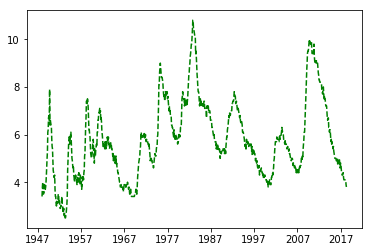

In [24]:
plt.plot(data,"g--") #to plot UNRATE in green and with +-es
plt.show() #to show the plot

Now, let's again use Quandl but to download not only one, but 2 indicators: US GDP and Unemployment rate

In [39]:
econ = quandl.get(["FRED/GDP","FRED/UNRATE"],auth_token="yourAPIkeyhere")
econ.tail(3)

,FRED/GDP - Value,FRED/UNRATE - Value
Date,,
2018-03-01,NaN,4.1
2018-04-01,NaN,3.9
2018-05-01,NaN,3.8


In [38]:
econ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 849 entries, 1947-01-01 to 2018-05-01
Data columns (total 2 columns):
FRED/GDP - Value       285 non-null float64
FRED/UNRATE - Value    845 non-null float64
dtypes: float64(2)
memory usage: 19.9 KB


In [41]:
econ["FRED/GDP - Value"].head() #choosing 1st column by name

Date
1947-01-01    243.080
1947-04-01    246.267
1947-07-01    250.115
1947-10-01    260.309
1948-01-01    266.173
Name: FRED/GDP - Value, dtype: float64

In [43]:
econ.iloc[0:10,0] #choosing first column and first 10 rows by index

Date
1947-01-01    243.080
1947-04-01    246.267
1947-07-01    250.115
1947-10-01    260.309
1948-01-01    266.173
1948-02-01        NaN
1948-03-01        NaN
1948-04-01    272.897
1948-05-01        NaN
1948-06-01        NaN
Name: FRED/GDP - Value, dtype: float64

In [50]:
unrate = econ.iloc[:,1] #choosing all rows and 2nd column only and saving in a new variable unrate
type(unrate)

pandas.core.series.Series

In [52]:
unrate.head() #first 5 rows

Date
1947-01-01    NaN
1947-04-01    NaN
1947-07-01    NaN
1947-10-01    NaN
1948-01-01    3.4
Name: FRED/UNRATE - Value, dtype: float64

In [56]:
unrate[unrate>unrate.median()] #filtering values that are higher than median 

Date
1949-05-01    6.1
1949-06-01    6.2
1949-07-01    6.7
1949-08-01    6.8
1949-09-01    6.6
1949-10-01    7.9
1949-11-01    6.4
1949-12-01    6.6
1950-01-01    6.5
1950-02-01    6.4
1950-03-01    6.3
1950-04-01    5.8
1954-03-01    5.7
1954-04-01    5.9
1954-05-01    5.9
1954-07-01    5.8
1954-08-01    6.0
1954-09-01    6.1
1954-10-01    5.7
1958-01-01    5.8
1958-02-01    6.4
1958-03-01    6.7
1958-04-01    7.4
1958-05-01    7.4
1958-06-01    7.3
1958-07-01    7.5
1958-08-01    7.4
1958-09-01    7.1
1958-10-01    6.7
1958-11-01    6.2
             ... 
2012-07-01    8.2
2012-08-01    8.1
2012-09-01    7.8
2012-10-01    7.8
2012-11-01    7.7
2012-12-01    7.9
2013-01-01    8.0
2013-02-01    7.7
2013-03-01    7.5
2013-04-01    7.6
2013-05-01    7.5
2013-06-01    7.5
2013-07-01    7.3
2013-08-01    7.2
2013-09-01    7.2
2013-10-01    7.2
2013-11-01    6.9
2013-12-01    6.7
2014-01-01    6.6
2014-02-01    6.7
2014-03-01    6.7
2014-04-01    6.3
2014-05-01    6.3
2014-06-01    6.1
2014-

In [58]:
econ.to_excel("econ.xlsx") #save this dataframe to an excel file

In [59]:
econ_read = pd.read_excel("econ.xlsx")

In [60]:
econ_read.head()

,Date,FRED/GDP - Value,FRED/UNRATE - Value
0,1947-01-01,243.080,NaN
1,1947-04-01,246.267,NaN
2,1947-07-01,250.115,NaN
3,1947-10-01,260.309,NaN
4,1948-01-01,266.173,3.4


In [61]:
econ["1991"]

,FRED/GDP - Value,FRED/UNRATE - Value
Date,,
1991-01-01,6054.867,6.4
1991-02-01,NaN,6.6
1991-03-01,NaN,6.8
1991-04-01,6143.612,6.7
1991-05-01,NaN,6.9
1991-06-01,NaN,6.9
1991-07-01,6218.425,6.8
1991-08-01,NaN,6.9
1991-09-01,NaN,6.9


In [62]:
econ_read["1991"]

KeyError: '1991'

In [63]:
econ_quarterly = quandl.get(["FRED/GDP","FRED/UNRATE"],collapse = "annual",auth_token="62LSmkDHdrcUQvyYrewV")

In [64]:
econ_quarterly.head()

,FRED/GDP - Value,FRED/UNRATE - Value
Date,,
1947-12-31,260.309,NaN
1948-12-31,280.656,4.0
1949-12-31,270.984,6.6
1950-12-31,320.320,4.3
1951-12-31,356.579,3.1


In [65]:
econ_quarterly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 1947-12-31 to 2018-12-31
Data columns (total 2 columns):
FRED/GDP - Value       72 non-null float64
FRED/UNRATE - Value    71 non-null float64
dtypes: float64(2)
memory usage: 1.7 KB


In [66]:
econ_quarterly.to_csv("econ_quarterly.csv")

In [67]:
econ_quarterly_clean = econ_quarterly.dropna() #drop rows with NAs

In [68]:
econ_quarterly_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 71 entries, 1948-12-31 to 2018-12-31
Data columns (total 2 columns):
FRED/GDP - Value       71 non-null float64
FRED/UNRATE - Value    71 non-null float64
dtypes: float64(2)
memory usage: 1.7 KB


In [69]:
econ_quarterly_clean.to_csv("econ_quarterly.csv")

In [75]:
df = pd.read_excel("econ.xlsx", sheet_name=1)

In [76]:
df.head()

,Date,FRED/GDP - Value,FRED/UNRATE - Value
0,1948-12-31,280.656,4.0
1,1949-12-31,270.984,6.6
2,1950-12-31,320.320,4.3
3,1951-12-31,356.579,3.1
4,1952-12-31,381.241,2.7


In [78]:
df.describe()

,FRED/GDP - Value,FRED/UNRATE - Value
count,71.000000,71.000000
mean,6163.691056,5.763380
std,6149.970533,1.628956
min,270.984000,2.700000
25%,803.984000,4.600000
50%,3796.121000,5.500000
75%,10586.801000,6.600000
max,19956.811000,10.800000


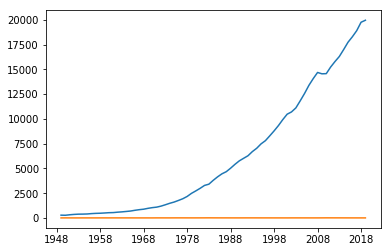

In [80]:
plt.plot(econ_quarterly_clean)
plt.show()

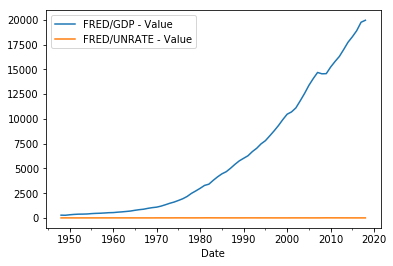

In [81]:
econ_quarterly_clean.plot()

In [84]:
econ_quarterly_clean["1991"]

,FRED/GDP - Value,FRED/UNRATE - Value
Date,,
1991-12-31,6279.296,7.3


In [85]:
df = df.set_index("Date")

In [86]:
df.head()

,FRED/GDP - Value,FRED/UNRATE - Value
Date,,
1948-12-31,280.656,4.0
1949-12-31,270.984,6.6
1950-12-31,320.320,4.3
1951-12-31,356.579,3.1
1952-12-31,381.241,2.7


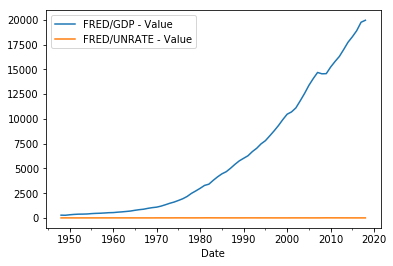

In [87]:
df.plot()

In [89]:
df["GDP"] = df["FRED/GDP - Value"]/df["FRED/GDP - Value"].max()*100

In [90]:
df.head()

,FRED/GDP - Value,FRED/UNRATE - Value,GDP
Date,,,
1948-12-31,280.656,4.0,1.406317
1949-12-31,270.984,6.6,1.357852
1950-12-31,320.320,4.3,1.605066
1951-12-31,356.579,3.1,1.786753
1952-12-31,381.241,2.7,1.910330


In [91]:
df_new = df.drop(["FRED/GDP - Value"],axis=1) #axis =0 for row, axis=1 for column

In [93]:
df_new.head()

,FRED/UNRATE - Value,GDP
Date,,
1948-12-31,4.0,1.406317
1949-12-31,6.6,1.357852
1950-12-31,4.3,1.605066
1951-12-31,3.1,1.786753
1952-12-31,2.7,1.910330


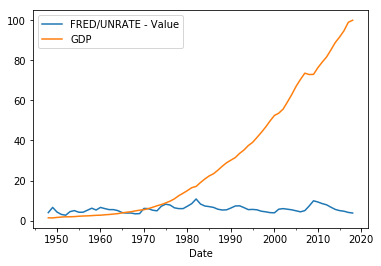

In [94]:
df_new.plot()

In [95]:
def my_plot(x):
    return plt.plot(df[x])

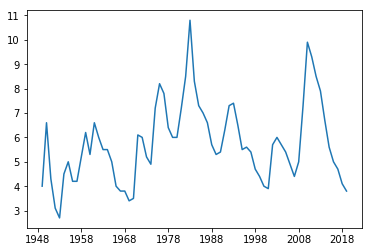

In [97]:
my_plot("FRED/UNRATE - Value")

In [101]:
df.apply(np.std)

FRED/GDP - Value       6106.507299
FRED/UNRATE - Value       1.617444
GDP                      30.598613
dtype: float64